In [1]:
# a. Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

In [2]:
# b. Load training and testing data
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

x_train = train.iloc[:, 1:].values / 255.0
y_train = to_categorical(train.iloc[:, 0])
x_test = test.iloc[:, 1:].values / 255.0
y_test = to_categorical(test.iloc[:, 0])

In [3]:
# c. Define Feedforward Neural Network
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [4]:
# d. Compile & train with SGD optimizer (11 epochs)
model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=11, 
                    validation_split=0.1, batch_size=128, verbose=1)

Epoch 1/11
422/422 [==============================] - 5s 11ms/step - loss: 1.0947 - accuracy: 0.7478 - val_loss: 0.4894 - val_accuracy: 0.8975
Epoch 2/11
422/422 [==============================] - 4s 10ms/step - loss: 0.4677 - accuracy: 0.8802 - val_loss: 0.3329 - val_accuracy: 0.9182
Epoch 3/11
422/422 [==============================] - 4s 10ms/step - loss: 0.3726 - accuracy: 0.8980 - val_loss: 0.2832 - val_accuracy: 0.9262
Epoch 4/11
422/422 [==============================] - 4s 10ms/step - loss: 0.3296 - accuracy: 0.9077 - val_loss: 0.2555 - val_accuracy: 0.9305
Epoch 5/11
422/422 [==============================] - 4s 10ms/step - loss: 0.3023 - accuracy: 0.9154 - val_loss: 0.2377 - val_accuracy: 0.9343
Epoch 6/11
422/422 [==============================] - 4s 10ms/step - loss: 0.2820 - accuracy: 0.9209 - val_loss: 0.2237 - val_accuracy: 0.9387
Epoch 7/11
422/422 [==============================] - 4s 10ms/step - loss: 0.2659 - accuracy: 0.9253 - val_loss: 0.2125 - val_accuracy: 0.9427

In [5]:
# e. Evaluate the model
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2096 - accuracy: 0.9400
Test Accuracy: 0.9400


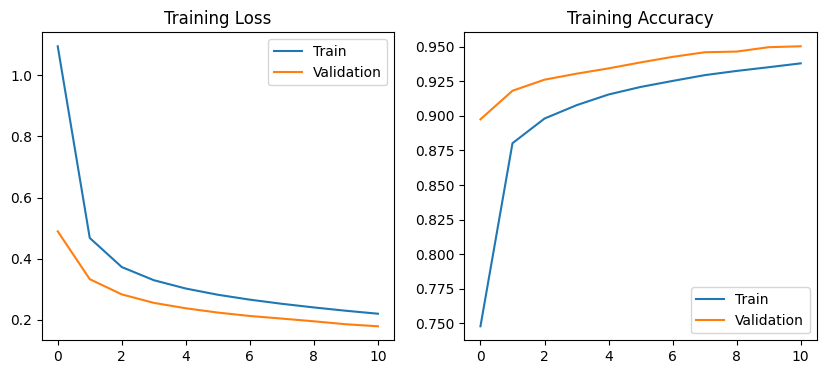

In [6]:
# f. Plot training loss & accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training Accuracy')
plt.legend()
plt.show()